In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import masking, plotting
from fbpca import pca
from scipy.signal import hilbert
import numpy as np

In [2]:
data_file = (
    "/Users/taylor/Documents/datasets/ds003643/derivatives/fmriprep/sub-EN100/func/"
    "sub-EN100_task-lppEN_run-1_desc-preproc_bold.nii.gz"
)
mask_file = (
    "/Users/taylor/Documents/datasets/ds003643/derivatives/fmriprep/sub-EN100/func/"
    "sub-EN100_task-lppEN_run-1_desc-brain_mask.nii.gz"
)
data = masking.apply_mask(data_file, mask_file)
# Remove first 10 volumes
data = data[10:, :]
print(data.shape)

(276, 24316)


In [3]:
data_complex = hilbert(data, axis=0)

In [4]:
n_volumes = data_complex.shape[0]
U, s, Va = pca(data_complex, k=10)
explained_variance_ = ((s ** 2) / (n_volumes - 1)) / data_complex.shape[1]
pc_scores = data_complex @ Va.T
loadings =  Va.T @ np.diag(s) 
loadings /= np.sqrt(data_complex.shape[0] - 1)

In [5]:
print(U.shape)
print(s.shape)
print(Va.shape)

(276, 10)
(10,)
(10, 24316)


<ipython-input-8-3a84b1a63472>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


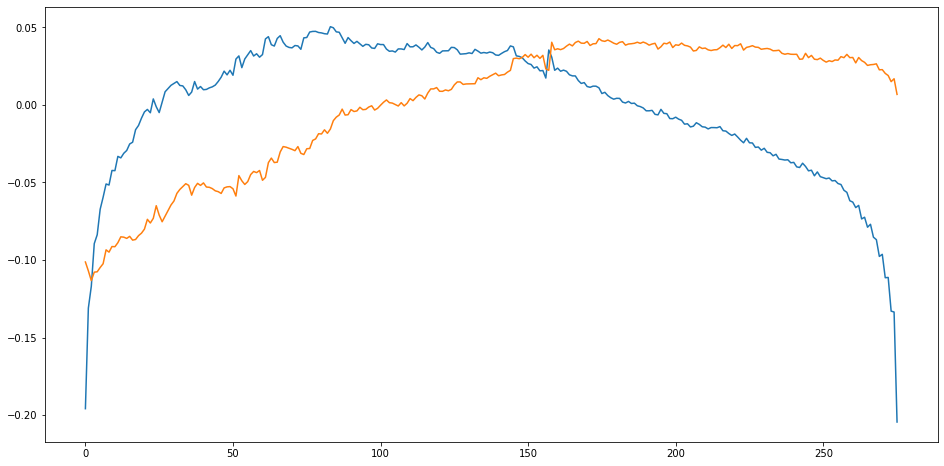

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(U.real[:, 0])
ax.plot(U.imag[:, 0])
fig.show()

/opt/miniconda3/lib/python3.8/site-packages/nilearn/_utils/niimg.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  niimg = new_img_like(niimg, _get_data(niimg).astype(dtype),


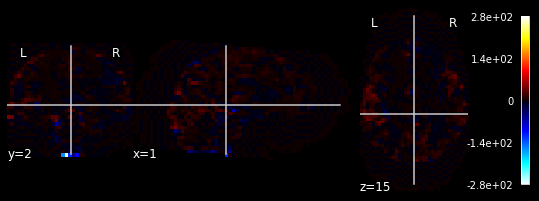

In [19]:
plotting.plot_stat_map(masking.unmask(loadings[:, 3], mask_file), bg_img=mask_file)